In [7]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

---
# Pré Processamento

### S03T02 - Normalizar ou padronizar colunas numéricas.S03T02 - Normalizar ou padronizar colunas numéricas.

In [8]:
df_tratado = pd.read_csv('data_root/df_limpo_refatorado.csv',index_col=0)
df_tratado

,magnitude,data,hora,periodo,depth,felt,continent,latitude,longitude,mmi,cdi,impacto,magnitude_range,media por magnitude
0,4.8,2024-09-17,00:49:42,Noite,4.0440,1893,North America,32.3984,-102.0440,5,6,Baixo,4-5,13.948079
1,5.1,2024-09-17,00:49:42,Noite,6.1279,2042,North America,32.4140,-102.0570,5,6,Médio,5-6,47.337353
2,3.7,2024-09-16,11:22:08,Manhã,10.9000,1580,North America,34.0678,-118.8070,4,4,Baixo,3-4,9.475134
3,3.9,2024-09-14,17:01:06,Tarde,6.2024,5,North America,31.6470,-104.4500,4,3,Baixo,3-4,9.475134
4,4.1,2024-09-14,17:01:06,Tarde,8.8140,4,North America,31.6323,-104.4730,4,3,Baixo,4-5,13.948079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,6.4,2024-01-11,09:20:26,Manhã,204.0000,111,Asia,36.5061,70.5994,4,5,Alto,6-7,112.842579
947,5.1,2023-12-18,10:18:52,Manhã,10.0000,8,Asia,33.2109,76.7733,6,5,Médio,5-6,47.337353
948,5.2,2023-10-22,01:54:21,Noite,25.7060,87,Asia,27.8679,84.7191,5,4,Médio,5-6,47.337353
949,5.0,2023-10-17,08:22:11,Manhã,10.0000,2,Asia,27.6888,56.0903,6,5,Baixo,4-5,13.948079


In [9]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 950
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   magnitude            951 non-null    float64
 1   data                 951 non-null    object 
 2   hora                 951 non-null    object 
 3   periodo              951 non-null    object 
 4   depth                951 non-null    float64
 5   felt                 951 non-null    int64  
 6   continent            951 non-null    object 
 7   latitude             951 non-null    float64
 8   longitude            951 non-null    float64
 9   mmi                  951 non-null    int64  
 10  cdi                  951 non-null    int64  
 11  impacto              951 non-null    object 
 12  magnitude_range      951 non-null    object 
 13  media por magnitude  951 non-null    float64
dtypes: float64(5), int64(3), object(6)
memory usage: 111.4+ KB


In [10]:
# Tratando a coluna 'magnitude_range': Convertendo para valores médios
def intervalo_para_media(intervalo):
    limites = intervalo.split('-')
    return (float(limites[0]) + float(limites[1])) / 2

df_tratado['magnitude_range'] = df_tratado['magnitude_range'].apply(intervalo_para_media)
display(df_tratado['magnitude_range'])

0      4.5
1      5.5
2      3.5
3      3.5
4      4.5
      ... 
946    6.5
947    5.5
948    5.5
949    4.5
950    5.5
Name: magnitude_range, Length: 951, dtype: float64

In [11]:
# Definindo as colunas numéricas que serão normalizadas
colunas_numericas = ['magnitude', 'depth', 'felt', 'latitude', 'longitude', 
                     'mmi', 'cdi', 'magnitude_range', 'media por magnitude']


In [12]:
# Aplicando a normalização (Min-Max Scaling)
scaler = MinMaxScaler()
df_normalizado = df_tratado.copy()
df_normalizado[colunas_numericas] = scaler.fit_transform(df_tratado[colunas_numericas])


In [13]:
# Visualizando o resultado
print("Dados Normalizados:")
display(df_normalizado)

Dados Normalizados:


,magnitude,data,hora,periodo,depth,felt,continent,latitude,longitude,mmi,cdi,impacto,magnitude_range,media por magnitude
0,0.439024,2024-09-17,00:49:42,Noite,0.006712,0.010300,North America,0.670067,0.216141,0.666667,0.666667,Baixo,0.428571,0.014972
1,0.512195,2024-09-17,00:49:42,Noite,0.009969,0.011111,North America,0.670211,0.216105,0.666667,0.666667,Médio,0.571429,0.074147
2,0.170732,2024-09-16,11:22:08,Manhã,0.017429,0.008597,North America,0.685462,0.169549,0.333333,0.444444,Baixo,0.285714,0.007045
3,0.219512,2024-09-14,17:01:06,Tarde,0.010086,0.000027,North America,0.663138,0.209454,0.333333,0.333333,Baixo,0.285714,0.007045
4,0.268293,2024-09-14,17:01:06,Tarde,0.014168,0.000022,North America,0.663003,0.209390,0.333333,0.333333,Baixo,0.428571,0.014972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,0.829268,2024-01-11,09:20:26,Manhã,0.319264,0.000604,Asia,0.707947,0.696001,0.333333,0.555556,Alto,0.714286,0.190239
947,0.512195,2023-12-18,10:18:52,Manhã,0.016022,0.000044,Asia,0.677560,0.713161,1.000000,0.555556,Médio,0.571429,0.074147
948,0.536585,2023-10-22,01:54:21,Noite,0.040572,0.000473,Asia,0.628288,0.735246,0.666667,0.444444,Médio,0.571429,0.074147
949,0.487805,2023-10-17,08:22:11,Manhã,0.016022,0.000011,Asia,0.626637,0.655673,1.000000,0.555556,Baixo,0.428571,0.014972


### S03T03 - Transformar variáveis categóricas em numéricas (one-hot encoding, label encoding, etc.).

In [14]:
# Transformar variáveis categóricas em numéricas (one-hot encoding, label encoding, etc.)

le = LabelEncoder()
df_normalizado["label_periodo"] = le.fit_transform(df_tratado['periodo'])
df_normalizado["label_continente"] = le.fit_transform(df_tratado['continent'])
df_normalizado["label_impacto"] = le.fit_transform(df_tratado['impacto'])
df_normalizado

,magnitude,data,hora,periodo,depth,felt,continent,latitude,longitude,mmi,cdi,impacto,magnitude_range,media por magnitude,label_periodo,label_continente,label_impacto
0,0.439024,2024-09-17,00:49:42,Noite,0.006712,0.010300,North America,0.670067,0.216141,0.666667,0.666667,Baixo,0.428571,0.014972,1,3,1
1,0.512195,2024-09-17,00:49:42,Noite,0.009969,0.011111,North America,0.670211,0.216105,0.666667,0.666667,Médio,0.571429,0.074147,1,3,2
2,0.170732,2024-09-16,11:22:08,Manhã,0.017429,0.008597,North America,0.685462,0.169549,0.333333,0.444444,Baixo,0.285714,0.007045,0,3,1
3,0.219512,2024-09-14,17:01:06,Tarde,0.010086,0.000027,North America,0.663138,0.209454,0.333333,0.333333,Baixo,0.285714,0.007045,2,3,1
4,0.268293,2024-09-14,17:01:06,Tarde,0.014168,0.000022,North America,0.663003,0.209390,0.333333,0.333333,Baixo,0.428571,0.014972,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,0.829268,2024-01-11,09:20:26,Manhã,0.319264,0.000604,Asia,0.707947,0.696001,0.333333,0.555556,Alto,0.714286,0.190239,0,1,0
947,0.512195,2023-12-18,10:18:52,Manhã,0.016022,0.000044,Asia,0.677560,0.713161,1.000000,0.555556,Médio,0.571429,0.074147,0,1,2
948,0.536585,2023-10-22,01:54:21,Noite,0.040572,0.000473,Asia,0.628288,0.735246,0.666667,0.444444,Médio,0.571429,0.074147,1,1,2
949,0.487805,2023-10-17,08:22:11,Manhã,0.016022,0.000011,Asia,0.626637,0.655673,1.000000,0.555556,Baixo,0.428571,0.014972,0,1,1


### S03T05 - Criar novas features relevantes para o problema.

In [15]:
# Indicando o impacto relativo do terremoto.
df_normalizado['magnitude_por_depth'] = df_tratado['magnitude'] / (df_tratado['depth'] + 1e-5)

# Relaçao entre Magnitude e Profundidade
df_normalizado["factor_magnitude_depth"] = df_tratado['magnitude'] * df_tratado['depth']

# Quadrado da Magnitude
df_normalizado['magnitude_quadrada'] = df_tratado['magnitude'] ** 2

# Normalizando com (Min - Max Scaling as novas features)
new_features = ['magnitude_por_depth', 'factor_magnitude_depth', 'magnitude_quadrada']
df_normalizado[new_features] = scaler.fit_transform(df_normalizado[new_features])

In [16]:
display(df_normalizado)

,magnitude,data,hora,periodo,depth,felt,continent,latitude,longitude,mmi,cdi,impacto,magnitude_range,media por magnitude,label_periodo,label_continente,label_impacto,magnitude_por_depth,factor_magnitude_depth,magnitude_quadrada
0,0.439024,2024-09-17,00:49:42,Noite,0.006712,0.010300,North America,0.670067,0.216141,0.666667,0.666667,Baixo,0.428571,0.014972,1,3,1,0.346404,0.004445,0.339049
1,0.512195,2024-09-17,00:49:42,Noite,0.009969,0.011111,North America,0.670211,0.216105,0.666667,0.666667,Médio,0.571429,0.074147,1,3,2,0.337334,0.007052,0.410770
2,0.170732,2024-09-16,11:22:08,Manhã,0.017429,0.008597,North America,0.685462,0.169549,0.333333,0.444444,Baixo,0.285714,0.007045,0,3,1,0.324733,0.009051,0.113258
3,0.219512,2024-09-14,17:01:06,Tarde,0.010086,0.000027,North America,0.663138,0.209454,0.333333,0.333333,Baixo,0.285714,0.007045,2,3,1,0.332132,0.005497,0.149964
4,0.268293,2024-09-14,17:01:06,Tarde,0.014168,0.000022,North America,0.663003,0.209390,0.333333,0.333333,Baixo,0.428571,0.014972,2,3,1,0.327948,0.008128,0.188602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,0.829268,2024-01-11,09:20:26,Manhã,0.319264,0.000604,Asia,0.707947,0.696001,0.333333,0.555556,Alto,0.714286,0.190239,0,1,0,0.316856,0.287668,0.771794
947,0.512195,2023-12-18,10:18:52,Manhã,0.016022,0.000044,Asia,0.677560,0.713161,1.000000,0.555556,Médio,0.571429,0.074147,0,1,2,0.329094,0.011401,0.410770
948,0.536585,2023-10-22,01:54:21,Noite,0.040572,0.000473,Asia,0.628288,0.735246,0.666667,0.444444,Médio,0.571429,0.074147,1,1,2,0.321226,0.029605,0.435644
949,0.487805,2023-10-17,08:22:11,Manhã,0.016022,0.000011,Asia,0.626637,0.655673,1.000000,0.555556,Baixo,0.428571,0.014972,0,1,1,0.328839,0.011180,0.386380


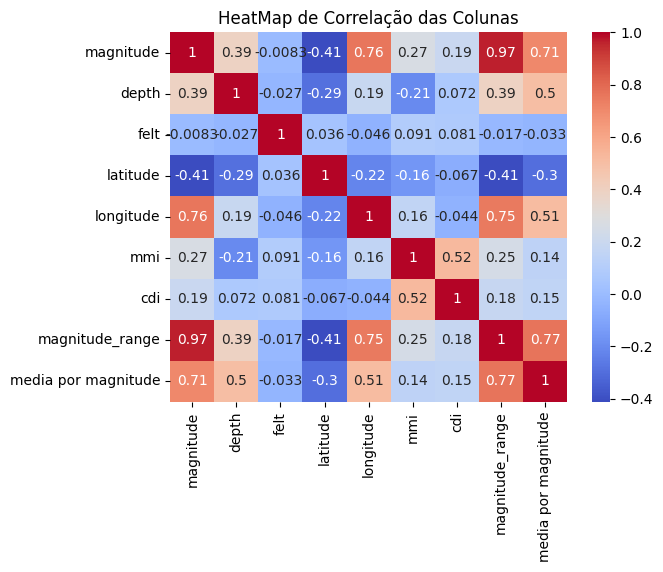

In [17]:
# Grafico para ver os dados das colunas criadas
#fig = px.box(df_normalizado, x=["magnitude_por_depth", "factor_magnitude_depth", "magnitude_quadrada"])
#fig.show

# Selecionando unicamente colunas númericas
numeric_cols = df_tratado.select_dtypes(include=['number']).columns

# Calculando a matriz de correlação
corr_matrix = df_tratado[numeric_cols].corr()

# Criando um heatmap com os argumentos corretos
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('HeatMap de Correlação das Colunas')
plt.show()

In [18]:
df_normalizado.to_csv('df_normalizado.csv')